In [52]:
import pandas as pd
#data
dataset = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data_set_PBS2.csv', engine='python')

In [53]:
#check the shape of data
dataset.shape

(130, 9)

In [54]:
dataset.head(13)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,OM,0.0000,0.0000,0.7676,0.0000,14.1895,22.3215,0.0000,0.0000
1,PA,162.1620,125.0598,165.0538,0.0000,40.2492,64.0953,0.0000,0.0000
2,PA6,3.4433,2.8920,5.0061,0.0000,0.0000,0.0000,0.0000,0.0000
3,PAPER,0.0000,0.0000,0.0000,178.5325,177.9549,111.4207,0.0000,0.0000
4,PBS,143.1750,110.3610,250.6670,2.5530,36.4880,58.0520,0.0000,0.0000
5,PE,0.0000,0.0000,73.1115,0.0000,0.0000,0.0000,194.8407,30.0063
6,PETmono,4.2491,3.2417,0.0000,0.0000,47.1720,75.1594,0.0000,0.0000
7,PETp,0.0000,0.0000,196.5714,0.0000,0.0000,0.0000,0.0000,0.0000
8,PLA,142.9452,110.2697,112.9331,0.0000,34.7932,55.3701,0.0000,0.0000
9,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,138.5009,21.2797


In [60]:
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (104, 9)
Unseen Data For Predictions: (26, 9)


In [61]:
#setting up the environment in Pycaret
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'MPs', session_id=123) 

,Description,Value
0,session_id,123
1,Target,MPs
2,Target Type,Multiclass
3,Label Encoded,"OM: 0, PA: 1, PA6: 2, PAPER: 3, PBS: 4, PE: 5, PETmono: 6, PETp: 7, PLA: 8, PP: 9, PS: 10, PSf: 11, PVC: 12"
4,Original Data,"(104, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
#comparation of models to identify best model
best = compare_models(fold=7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9857,0.0000,0.9857,0.9786,0.9810,0.9841,0.9856,0.1143
lr,Logistic Regression,0.9584,0.0000,0.9584,0.9377,0.9446,0.9540,0.9580,0.1429
rf,Random Forest Classifier,0.9584,0.0000,0.9571,0.9519,0.9541,0.9537,0.9549,0.1371
dt,Decision Tree Classifier,0.9429,0.0000,0.9182,0.9286,0.9333,0.9367,0.9421,0.0100
nb,Naive Bayes,0.9325,0.0000,0.9299,0.9030,0.9121,0.9249,0.9322,0.0100
lda,Linear Discriminant Analysis,0.9286,0.0000,0.9169,0.9143,0.9190,0.9208,0.9247,0.0086
gbc,Gradient Boosting Classifier,0.8896,0.0000,0.8766,0.8623,0.8714,0.8776,0.8838,0.4200
lightgbm,Light Gradient Boosting Machine,0.8610,0.0000,0.8584,0.8273,0.8385,0.8455,0.8511,0.0586
knn,K Neighbors Classifier,0.8325,0.0000,0.8221,0.7701,0.7909,0.8145,0.8262,0.0157
ridge,Ridge Classifier,0.6390,0.0000,0.5977,0.5299,0.5647,0.6047,0.6311,0.0086


In [63]:
top3 = compare_models(fold=7,n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9857,0.0000,0.9857,0.9786,0.9810,0.9841,0.9856,0.1129
lr,Logistic Regression,0.9584,0.0000,0.9584,0.9377,0.9446,0.9540,0.9580,0.1486
rf,Random Forest Classifier,0.9584,0.0000,0.9571,0.9519,0.9541,0.9537,0.9549,0.1371
dt,Decision Tree Classifier,0.9429,0.0000,0.9182,0.9286,0.9333,0.9367,0.9421,0.0086
nb,Naive Bayes,0.9325,0.0000,0.9299,0.9030,0.9121,0.9249,0.9322,0.0114
lda,Linear Discriminant Analysis,0.9286,0.0000,0.9169,0.9143,0.9190,0.9208,0.9247,0.0086
gbc,Gradient Boosting Classifier,0.8896,0.0000,0.8766,0.8623,0.8714,0.8776,0.8838,0.4371
lightgbm,Light Gradient Boosting Machine,0.8610,0.0000,0.8584,0.8273,0.8385,0.8455,0.8511,0.0486
knn,K Neighbors Classifier,0.8325,0.0000,0.8221,0.7701,0.7909,0.8145,0.8262,0.0143
ridge,Ridge Classifier,0.6390,0.0000,0.5977,0.5299,0.5647,0.6047,0.6311,0.0086


In [64]:
print(top3)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features

In [66]:
dt = create_model('et', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9857,0.0000,0.9857,0.9786,0.9810,0.9841,0.9856
Std,0.0350,0.0000,0.0350,0.0525,0.0467,0.0389,0.0354


In [67]:
dh = create_model('lr', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.8636,0.8788,0.9000,0.9083
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9584,0.0000,0.9584,0.9377,0.9446,0.9540,0.9580
Std,0.0481,0.0000,0.0481,0.0721,0.0641,0.0533,0.0486


In [68]:
de = create_model('rf', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,0.0000,0.8000,0.8000,0.8000,0.7778,0.7778
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9584,0.0000,0.9571,0.9519,0.9541,0.9537,0.9549
Std,0.0719,0.0000,0.0728,0.0779,0.0755,0.0800,0.0792


In [69]:
tuned_dh = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9727,0.0000,0.9714,0.9591,0.9636,0.9696,0.9722
Std,0.0432,0.0000,0.0452,0.0648,0.0576,0.0482,0.0440


In [70]:
tuned_de = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9727,0.0000,0.9714,0.9591,0.9636,0.9696,0.9722
Std,0.0432,0.0000,0.0452,0.0648,0.0576,0.0482,0.0440


In [42]:
tuned_dt = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9727,0.0000,0.9714,0.9591,0.9636,0.9696,0.9722
Std,0.0432,0.0000,0.0452,0.0648,0.0576,0.0482,0.0440


In [71]:
print(tuned_dt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


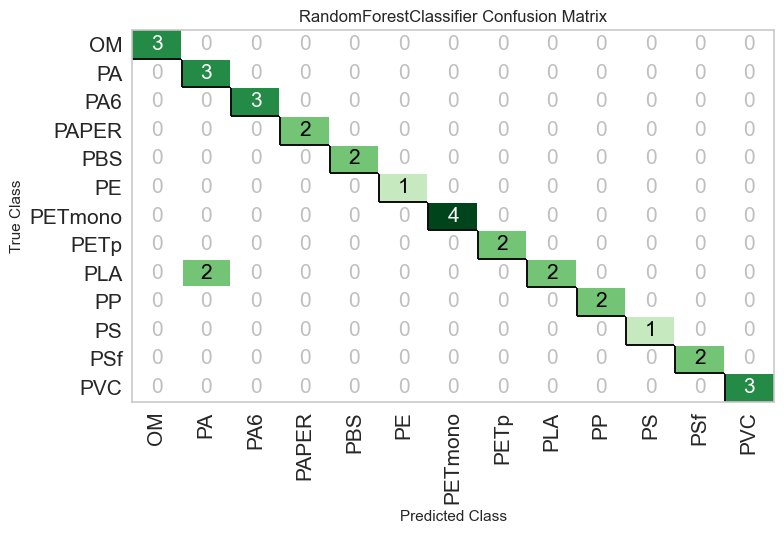

In [72]:
plot_model(tuned_dt, plot = 'confusion_matrix')

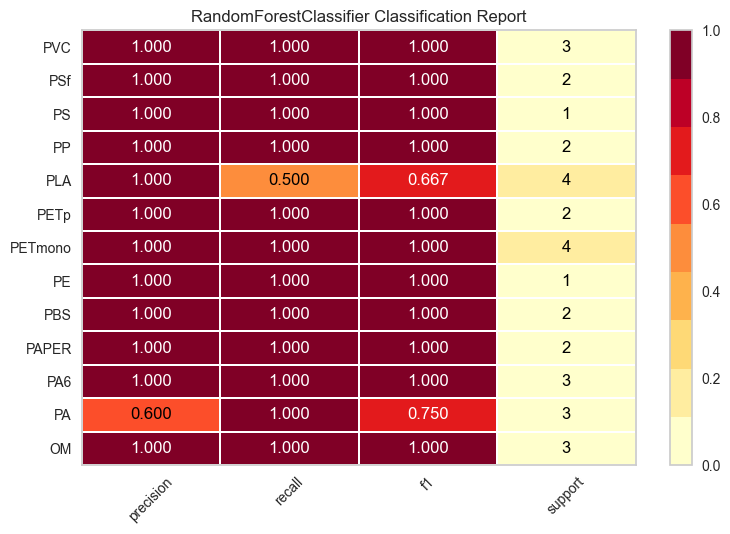

In [73]:
plot_model(tuned_dt, plot = 'class_report')

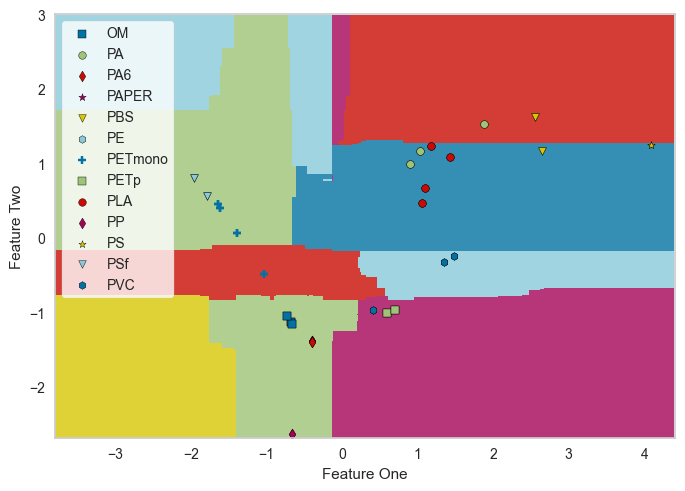

In [74]:
plot_model(tuned_dt, plot='boundary')

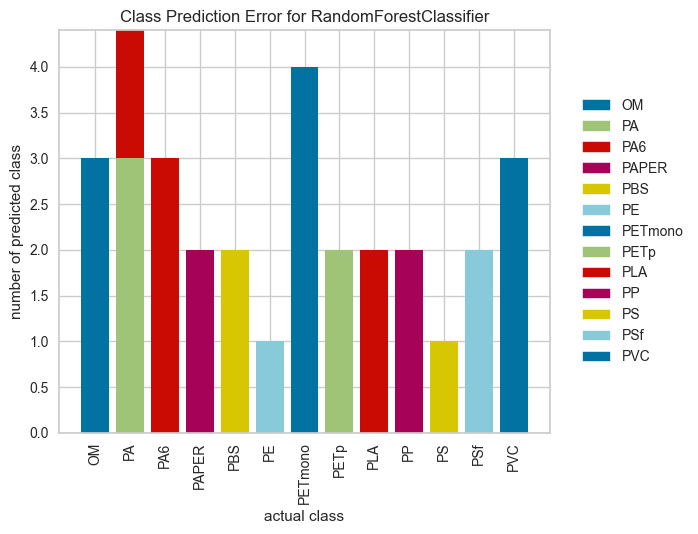

In [75]:
plot_model(tuned_dt, plot = 'error')

In [76]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9375,0.9955,0.9615,0.9625,0.9349,0.9316,0.9356


In [84]:
rfc = finalize_model(tuned_dt)

In [85]:
unseen_predictions = predict_model(rfc, data=data_unseen)
unseen_predictions.head(25)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PBS,143.1750,110.3610,250.66700,2.5530,36.4880,58.0520,0.0000,0.000000,PBS,0.4582
1,PE,0.0000,0.0000,73.11150,0.0000,0.0000,0.0000,194.8407,30.006300,PE,0.4057
2,PS,248.2050,191.4780,251.29350,0.0000,0.0000,0.0000,65.6080,9.927400,PS,0.6412
3,PE,30.0315,23.3120,53.48730,0.0000,0.0000,0.0000,157.4796,24.271500,PVC,0.3371
4,PETp,0.0000,0.0000,189.46410,0.0000,0.0000,0.0000,0.0000,0.000000,PETp,0.6974
5,PP,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,152.0678,23.393500,PP,0.5932
6,PS,219.8300,169.4190,253.92720,0.0000,0.0000,0.0000,5.3130,0.531000,PS,0.6197
7,PVC,30.9560,24.1150,94.54260,0.0000,0.0000,0.0000,0.0000,0.000000,PVC,0.5948
8,PBS,194.3570,149.7710,251.91600,0.8870,34.0750,54.2400,0.0000,0.000000,PBS,0.7018
9,PP,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,164.2430,25.280300,PP,0.5952


In [86]:
#saving the modelrfc
save_model(rfc,'Final etc Model 16May2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='MPs',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
                                         max_featur

In [87]:
saved_rfc = load_model('Final etc Model 16May2023')

Transformation Pipeline and Model Successfully Loaded


In [89]:
new_prediction = predict_model(saved_rfc, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [91]:
new_prediction.head(25)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PBS,143.1750,110.3610,250.66700,2.5530,36.4880,58.0520,0.0000,0.000000,PBS,0.4582
1,PE,0.0000,0.0000,73.11150,0.0000,0.0000,0.0000,194.8407,30.006300,PE,0.4057
2,PS,248.2050,191.4780,251.29350,0.0000,0.0000,0.0000,65.6080,9.927400,PS,0.6412
3,PE,30.0315,23.3120,53.48730,0.0000,0.0000,0.0000,157.4796,24.271500,PVC,0.3371
4,PETp,0.0000,0.0000,189.46410,0.0000,0.0000,0.0000,0.0000,0.000000,PETp,0.6974
5,PP,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,152.0678,23.393500,PP,0.5932
6,PS,219.8300,169.4190,253.92720,0.0000,0.0000,0.0000,5.3130,0.531000,PS,0.6197
7,PVC,30.9560,24.1150,94.54260,0.0000,0.0000,0.0000,0.0000,0.000000,PVC,0.5948
8,PBS,194.3570,149.7710,251.91600,0.8870,34.0750,54.2400,0.0000,0.000000,PBS,0.7018
9,PP,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,164.2430,25.280300,PP,0.5952


In [68]:
data2 = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data2.csv', engine='python')

In [69]:
data2

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,PP,0.000,0.000,0.000,0,0.000,0.000,157.483,24.254
1,PP,0.000,0.000,0.000,0,0.000,0.000,120.903,18.559
2,PE102,142.338,109.799,147.041,0,35.069,55.819,23.741,3.400
3,PLA,28.535,22.293,40.781,0,50.217,80.045,15.706,2.004
4,PP,0.000,0.000,0.000,0,6.391,10.047,100.813,15.423
5,PP,0.000,0.000,0.000,0,6.447,10.118,101.315,15.503
6,PS,248.014,191.366,249.374,0,3.000,4.000,54.586,8.204
7,PS,236.927,182.718,252.486,0,3.000,4.000,34.835,5.123
8,PVC,26.652,15.291,114.248,0,0.000,0.000,0.000,0.000
9,PVC,22.043,17.434,105.909,0,0.000,0.000,0.000,0.000


In [70]:
new_prediction = predict_model(saved_rfc3, data=data2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [71]:
new_prediction.head(10)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PP,0.000,0.000,0.000,0,0.000,0.000,157.483,24.254,PP,0.9855
1,PP,0.000,0.000,0.000,0,0.000,0.000,120.903,18.559,PP,0.9826
2,PE102,142.338,109.799,147.041,0,35.069,55.819,23.741,3.400,PLA,0.5064
3,PLA,28.535,22.293,40.781,0,50.217,80.045,15.706,2.004,PA,0.2857
4,PP,0.000,0.000,0.000,0,6.391,10.047,100.813,15.423,PP,0.4436
5,PP,0.000,0.000,0.000,0,6.447,10.118,101.315,15.503,PP,0.4436
6,PS,248.014,191.366,249.374,0,3.000,4.000,54.586,8.204,PS,0.8495
7,PS,236.927,182.718,252.486,0,3.000,4.000,34.835,5.123,PS,0.8526
8,PVC,26.652,15.291,114.248,0,0.000,0.000,0.000,0.000,PVC,0.9264
9,PVC,22.043,17.434,105.909,0,0.000,0.000,0.000,0.000,PVC,0.9264


In [72]:
dfram = pd.DataFrame(new_prediction)

In [73]:
dfram.to_csv('artificial_samples_prediction.csv')